<a href="https://colab.research.google.com/github/SiLiKhon/MLatICL2019/blob/master/05_lab/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello, pytorch

![img](https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png)


> **!!!** If you're running this notebook on Colab, make sure you enable the GPU support by going to `'Edit'->'Notebook settings'` and setting `'Hardware accelerator'` to `'GPU'`.

[PyTrorch](http://pytorch.org/) and [TensorFlow](https://www.tensorflow.org/) are two of the most commonly used deep learning frameworks. Both of these tools are notable for their ability to compute gradients automatically and do operations on GPU, which can be by orders of magnitude faster than running on CPU. Even though both libraries serve the same purpose, they are quite different in the ways they approach calculations.

TensorFlow makes your code live in two "worlds" simultaneously:  symbolic graphs and actual tensors. First you declare a symbolic "recipe" of how to get from inputs to outputs, then feed it with actual data.
Nowdays with TensorFlow 2.0 it is not exactly the case anymore. You can have similar to PyTorch world.

In pytorch, there's only one world: all tensors have a numeric value. You can compute outputs on the fly without pre-declaring anything, and the code looks (almost) exactly as in pure numpy. Due to this simplicity, PyTorch is going to be our weapon of choice for this course.


We'll start from using the low-level core of PyTorch, and then try out some high-level features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
print(torch.__version__)

1.3.1


In [2]:
# numpy world

x = np.arange(16).reshape(4, 4)

print("X :\n{}\n".format(x))
print("X.shape : {}\n".format(x.shape))
print("add 5 :\n{}\n".format(x + 5))
print("X*X^T  :\n{}\n".format(np.dot(x, x.T)))
print("mean over cols :\n{}\n".format(x.mean(axis=-1)))
print("cumsum of cols :\n{}\n".format(np.cumsum(x, axis=0)))

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

X.shape : (4, 4)

add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]

X*X^T  :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]

mean over cols :
[ 1.5  5.5  9.5 13.5]

cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]



In [3]:
# pytorch world
x = np.arange(16).reshape(4, 4) # (starting form a numpy array)

x = torch.from_numpy(x).type(torch.float) # or torch.arange(0,16).reshape(4,4)
x = x.cuda()
#      ^^^ this will move the tensor onto GPU memory

print("X :\n{}".format(x))
print("X.shape : {}\n".format(x.shape))
print("add 5 :\n{}".format(x + 5))
print("X*X^T  :\n{}".format(torch.matmul(x, torch.t(x))))
print("mean over cols :\n{}".format(x.mean(dim=-1)))
print("cumsum of cols :\n{}".format(x.cumsum(dim=0)))

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]], device='cuda:0')
X.shape : torch.Size([4, 4])

add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]], device='cuda:0')
X*X^T  :
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]], device='cuda:0')
mean over cols :
tensor([ 1.5000,  5.5000,  9.5000, 13.5000], device='cuda:0')
cumsum of cols :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]], device='cuda:0')


## NumPy and Pytorch

As you can notice, pytorch allows you to hack stuff much in the same way you did with numpy. No graph declaration, no placeholders, no sessions. This means that you can *see the numeric value of any tensor at any moment of time*. Debugging such code can be done by printing tensors or using any debug tool you want (e.g. [gdb](https://wiki.python.org/moin/DebuggingWithGdb)).

You may also see a few new method names and a different API. So no, there's no compatibility with numpy [yet](https://github.com/pytorch/pytorch/issues/2228) and yes, you'll have to memorize all the names again. Get excited!

![img](http://i0.kym-cdn.com/entries/icons/original/000/017/886/download.jpg)

For example, 
* If something takes a list/tuple of axes in numpy, you can expect it to take *args in pytorch
 * `x.reshape([1,2,8]) -> x.reshape(1,2,8)`
* You should swap _axis_ for _dim_ in operations like mean or cumsum
 * `x.sum(axis=-1) -> x.sum(dim=-1)`
* most mathematical operations are the same, but types and shaping is different
 * `x.astype('int64') -> x.type(torch.LongTensor)`

To help you acclimatize, there's a [table](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users) covering most new things. There's also a neat [documentation page](http://pytorch.org/docs/master/).

Finally, if you're stuck with a technical problem, we recommend searching [pytorch forumns](https://discuss.pytorch.org/). Or just googling, which usually works just as efficiently. 

If you feel like you almost give up, remember two things: **GPU** and **gradients for free**. Besides you can always jump back to numpy with x.numpy().

### Warmup: trigonometric knotwork
_inspired by [this post](https://www.quora.com/What-are-the-most-interesting-equation-plots)_

There are some simple mathematical functions with cool plots. For one, consider this:

$$ x(t) = t - 1.5 * cos( 15 t) $$
$$ y(t) = t - 1.5 * sin( 16 t) $$


In [4]:
t = torch.linspace(-10, 10, steps = 10000)

# compute x(t) and y(t) as defined above
x = ###YOUR CODE
y = ###YOUR CODE

plt.plot(x.numpy(), y.numpy());

SyntaxError: ignored

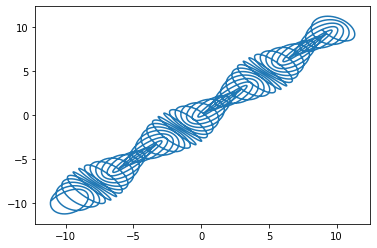

In [5]:
#### SOLUTION! ####

t = torch.linspace(-10, 10, steps = 10000)

# compute x(t) and y(t) as defined above
x = t - 1.5 * torch.cos(15 * t)
y = t - 1.5 * torch.sin(16 * t)

plt.plot(x.numpy(), y.numpy());

if you're done early, try adjusting the formula and see how it affects the plot

# Game of Life

Now it's time for you to make something more challenging. We'll implement Conway's Game of Life in pure pytorch.

While this is still a toy task, implementing game of life this way has one cool benefit: you'll be able to run it on GPU! Indeed, what could be a better use of your gpu than simulating game of life on 1M/1M grids?

here's the game of life:
You have a 2D grid of cells, where each cell is "alive"(1) or "dead"(0)
Any living cell that has 2 or 3 neighbors survives, else it dies [0,1 or 4+ neighbors]
Any cell with exactly 3 neighbors becomes alive (if it was dead)
For this task, you are given a reference numpy implementation that you must convert to pytorch. 
[numpy code inspired by: https://github.com/rougier/numpy-100]

Note: You can find convolution in torch.nn.functional.conv2d(Z,filters). Note that it has a different input format.






In [0]:
from scipy.signal import convolve2d

def np_update(Z):
    # Count neighbours with convolution
    filters = np.array([[1,1,1],
                        [1,0,1],
                        [1,1,1]])
    
    N = convolve2d(Z,filters,mode='same')
    
    # Apply rules
    birth = (N==3) & (Z==0)
    survive = ((N==2) | (N==3)) & (Z==1)
    
    Z[:] = birth | survive
    return Z

In [0]:
def torch_update(Z):
    """
    Implement an update function that does to Z exactly the same as np_update.
    :param Z: torch.FloatTensor of shape [height,width] containing 0s(dead) an 1s(alive)
    :returns: torch.FloatTensor Z after updates.
    
    You can opt to create new tensor or change Z inplace.
    """
    
    #<Your code here!>
    
    return Z

In [0]:
# SOLUTION
def torch_update(Z):
    """
    Implement an update function that does to Z exactly the same as np_update.
    :param Z: torch.FloatTensor of shape [height,width] containing 0s(dead) an 1s(alive)
    :returns: torch.FloatTensor Z after updates.
    
    You can opt to create new tensor or change Z inplace.
    """
    filters = torch.Tensor([[1,1,1],
                    [1,0,1],
                    [1,1,1]]).unsqueeze(0).unsqueeze(0)

    N = torch.nn.functional.conv2d(Z.unsqueeze(0).unsqueeze(0), weight=filters, padding=1)

    birth = (N==3) & (Z==0)
    survive = ((N==2) | (N==3)) & (Z==1)
    Z[:] = birth | survive
    
    return Z

In [5]:
#initial frame
Z_numpy = np.random.choice([0,1],p=(0.5,0.5),size=(100,100))
Z = torch.from_numpy(Z_numpy).type(torch.FloatTensor)

#your debug polygon :)
Z_new = torch_update(Z.clone())

#tests
Z_reference = np_update(Z_numpy.copy())
assert np.all(Z_new.numpy() == Z_reference), "your pytorch implementation doesn't match np_update. Look into Z and np_update(ZZ) to investigate."
print("Well done!")

Well done!


In [0]:
## Animation function
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
def make_animation(Z):
    fig, ax = plt.subplots()
    plt.close()

    im = ax.imshow(Z, cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(-0.05, 1)  # Make background gray
    Z_blank = np.zeros_like(Z.numpy())
    # initialization function: plot the background of each frame
    def init():
        im.set_data(Z_blank)
        return (im,)

    # animation function. This is called sequentially  
    def animate(i):
        global Z
        im.set_data(Z.numpy())
        Z = torch_update(Z)
        return (im,)
      

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=100, interval=100, blit=True)

    # Note: below is the part which makes it work on Colab
    rc('animation', html='jshtml')
    return anim

In [15]:
Z = np.random.choice([0,1],size=(100,100))
Z = torch.from_numpy(Z).type(torch.FloatTensor)
make_animation(Z)

In [16]:
#Some fun setups for your amusement

#parallel stripes
Z = np.arange(100)%2 + np.zeros([100,100])
#with a small imperfection
Z[48:52,50]=1

Z = torch.from_numpy(Z).type(torch.FloatTensor)

make_animation(Z)

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


## Automatic gradients

Any self-respecting DL framework must do your backprop for you. Torch handles this through `requires_grad` parameter when creating tensors.

The general pipeline looks like this:
* You create ```a = torch.tensor(data, requires_grad=True)```
* You define some differentiable `loss = whatever(a)`
* Call `loss.backward()`
* Gradients are now available as ```a.grad```

**Here's an example:** let's fit a linear regression on Boston house prices

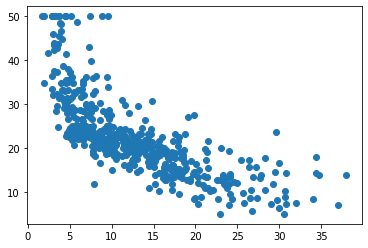

In [22]:
from sklearn.datasets import load_boston
boston = load_boston()
# Let's have a look at the last feature:
plt.scatter(boston.data[:, -1], boston.target);

We'll try a linear regression model using this single feature, and we'll use **gradient descent** to optimize the parameters. This is going to be our starting point:

In [30]:
# Defining the parameters of our model:
w = torch.zeros(1, requires_grad=True, dtype=torch.float64)
b = torch.zeros(1, requires_grad=True, dtype=torch.float64)
#         You want to make sure all tensors have    ^^^
#         the same dtype

# Converting our data to torch tensors:
x = torch.from_numpy(boston.data[:,-1]) / 10
y = torch.from_numpy(boston.target)

# prediction:
y_pred = w * x + b
# loss:
loss = ((y_pred - y)**2).mean()
print("Loss is:", loss)

# Compute gradients:
loss.backward()

Loss is: tensor(592.1469, dtype=torch.float64, grad_fn=<MeanBackward0>)


The gradients are now stored in `.grad` of a variable.

In [24]:
print("dL/dw =", w.grad)
print("dL/db =", b.grad)


dL/dw = tensor([-47.3514], dtype=torch.float64)
dL/db = tensor([-45.0656], dtype=torch.float64)


If you compute gradients from multiple losses, the gradients will add up at variables, therefore you usually want to **zero the gradients** between iteratons.

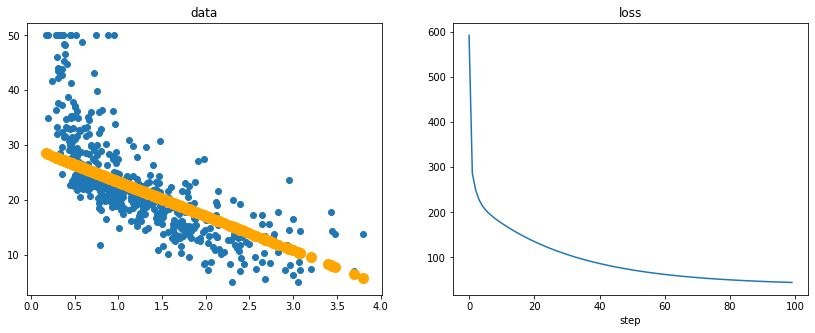

loss =  44.59417743397209


In [31]:
from IPython.display import clear_output

# let's keep the history of loss values at 
# each step
losses = []

# Gradient descent:
for i in range(100):
  # Calculate current prediction and loss:
  y_pred = w * x  + b
  loss = ((y_pred - y)**2).mean()
  losses.append(loss.item())
  #                   ^^^
  # The '.item' call returns the value of this 
  # tensor as a standard Python number (this only works
  # for tensors with one element).
  
  # Compute the gradients
  loss.backward()

  with torch.no_grad():
    # ^^^ this `with` statement ensures that
    #     automatic gradients will not be computed
    #     for whatever is written in the current block:
    w -= 0.05 * w.grad
    b -= 0.05 * b.grad


  # manually zero the gradients
  w.grad.zero_()
  b.grad.zero_()

  # the rest of code is just bells and whistles
  if (i + 1) % 5 == 0:
    clear_output(True)
    plt.figure(figsize=(14, 5))
    
    # We'll draw the data points and fit result on the left subplot
    plt.subplot(1, 2, 1)
    plt.title("data")
    plt.scatter(x.numpy(), y.numpy())
    plt.scatter(x.numpy(), y_pred.detach().numpy(),
                color='orange', linewidth=5)
    # The '.detach()' call is needed here to create a
    # copy of 'y_pred' that does not require gradients
    # (otherwize it's impossible to get a numpy
    # representation).
    
    # We'll draw the loss (as the function of gradient descent
    # step) on the right subplot
    plt.subplot(1, 2, 2)
    plt.title("loss")
    plt.plot(losses)
    plt.xlabel('step')
    
    plt.show()

    print("loss = ", loss.detach().numpy())

try implementing and writing some nonlinear regression. You can try quadratic features or some trigonometry, or a simple neural network. The only difference is that now you have more variables and a more complicated `y_pred`. 

In [0]:
from IPython.display import clear_output

# let's keep the history of loss values at 
# each step
losses = []

powers = range(-2,3)
w = <YOUR CODE>

# Gradient descent:
for i in range(100):
  y_pred = <YOUR CODE>
  loss = ((y_pred - y)**2).mean()
  losses.append(loss.item())
  loss.backward()

  with torch.no_grad():
    # ^^^ this `with` statement ensures that
    #     automatic gradients will not be computed
    #     for whatever is written in the current block:
    w -= 0.05 * w.grad
    b -= 0.05 * b.grad


  # manually zero the gradients
  w.grad.zero_()
  b.grad.zero_()

  # the rest of code is just bells and whistles
  if (i + 1) % 5 == 0:
    clear_output(True)
    plt.figure(figsize=(14, 5))
    
    # We'll draw the data points and fit result on the left subplot
    plt.subplot(1, 2, 1)
    plt.title("data")
    plt.scatter(x.numpy(), y.numpy())
    plt.scatter(x.numpy(), y_pred.detach().numpy(),
                color='orange', linewidth=5)
    # The '.detach()' call is needed here to create a
    # copy of 'y_pred' that does not require gradients
    # (otherwize it's impossible to get a numpy
    # representation).
    
    # We'll draw the loss (as the function of gradient descent
    # step) on the right subplot
    plt.subplot(1, 2, 2)
    plt.title("loss")
    plt.plot(losses)
    plt.xlabel('step')
    
    plt.show()

    print("loss = ", loss.detach().numpy())

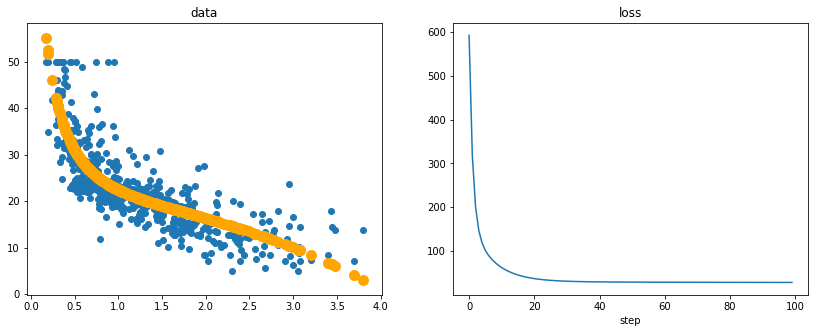

loss =  28.266191982414643


In [32]:
# SOLUTION
from IPython.display import clear_output

# let's keep the history of loss values at 
# each step
losses = []

powers = range(-2,3)
w = torch.zeros(len(powers), requires_grad=True, dtype=torch.float64)

# Gradient descent:
for i in range(100):
  # Calculate current prediction and loss:
  #y_pred = w * x  + b
  y_pred = (torch.stack([
              x**p for p in powers
          ], dim=1) * w.view(1, -1)).sum(dim=1)
  loss = ((y_pred - y)**2).mean()
  losses.append(loss.item())
  #                   ^^^
  # The '.item' call returns the value of this 
  # tensor as a standard Python number (this only works
  # for tensors with one element).
  
  # Compute the gradients
  loss.backward()

  with torch.no_grad():
    # ^^^ this `with` statement ensures that
    #     automatic gradients will not be computed
    #     for whatever is written in the current block:
    w -= 0.05 * w.grad
    b -= 0.05 * b.grad


  # manually zero the gradients
  w.grad.zero_()
  b.grad.zero_()

  # the rest of code is just bells and whistles
  if (i + 1) % 5 == 0:
    clear_output(True)
    plt.figure(figsize=(14, 5))
    
    # We'll draw the data points and fit result on the left subplot
    plt.subplot(1, 2, 1)
    plt.title("data")
    plt.scatter(x.numpy(), y.numpy())
    plt.scatter(x.numpy(), y_pred.detach().numpy(),
                color='orange', linewidth=5)
    # The '.detach()' call is needed here to create a
    # copy of 'y_pred' that does not require gradients
    # (otherwize it's impossible to get a numpy
    # representation).
    
    # We'll draw the loss (as the function of gradient descent
    # step) on the right subplot
    plt.subplot(1, 2, 2)
    plt.title("loss")
    plt.plot(losses)
    plt.xlabel('step')
    
    plt.show()

    print("loss = ", loss.detach().numpy())

## High-level PyTorch

We're now going to teach the computer to identify some clothes. Exciting, isn't it? The dataset we'll use for that is called [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist). Here's an excerpt from their website:

> *Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.*

So, if you're familiar with the original [MNIST](http://yann.lecun.com/exdb/mnist/) dataset (handwritten digits), this is kinda the same, but about clothes.

In [0]:
!rm -r FashionMNIST

PyTorch has a module dedicated to retrieving datasets, so let's use it:

In [0]:
from torchvision.datasets import FashionMNIST

In [12]:
# Getting the train and test parts of the dataset
data_train = FashionMNIST("FashionMNIST/",
                          download=True,
                          train=True)

data_test = FashionMNIST("FashionMNIST/",
                          download=True,
                          train=False)

# In fact, it's already stored as torch tensor, but we'll need
# to work with the numpy representation, so let's do the convertion:
X_train = data_train.train_data.numpy()
y_train = data_train.train_labels.numpy()

X_test = data_test.test_data.numpy()
y_test = data_test.test_labels.numpy()


0it [00:00, ?it/s]

26427392it [00:01, 13626131.11it/s]                             


Extracting FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 92018.09it/s]                            
0it [00:00, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw


4423680it [00:01, 4007195.90it/s]                             
0it [00:00, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw


8192it [00:00, 33588.05it/s]            

Extracting FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw
Processing...
Done!



/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


The datasets consists of images belonging to one out of 10 classes:

| Label | Description | | Label | Description |
| ---       
| 0        | T-shirt/top   || 5        | Sandal         |
| 1        | Trouser        || 6        | Shirt             |
| 2        | Pullover       || 7        | Sneaker       |
| 3        | Dress           || 8        | Bag              |
| 4        | Coat             || 9        | Ankle boot  |






Let's check out the shapes of our arrays:

In [13]:
print(X_train.shape, y_train.shape)
print(X_test .shape, y_test .shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


And now we are going to plot images from specific categories

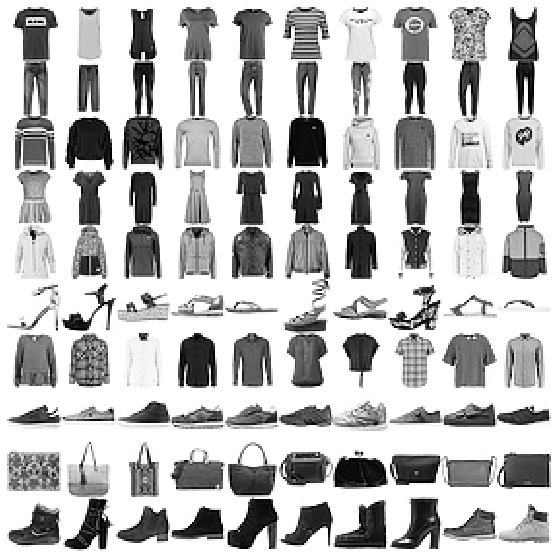

In [16]:
categories = [
    X_train[y_train == i]
    for i in range(10)
]

ten_of_each = np.array([c[:10] for c in categories])
ten_of_each = np.transpose(ten_of_each, (0, 2, 1, 3)).reshape(280, 280)

plt.figure(figsize=(10, 10))
plt.imshow(ten_of_each, cmap='Greys')
plt.axis('off');

Ok, so let's start writing our first deep learning model! For that we'll need 3 things:
  - a **loss** function that takes predicted class scores and true labels, and outputs a measure of how wrong we are in our predictions
  - a **function** that converts the input features to class scores (this will be represented by a neural network)
  - an **optimization algorithm** that'll vary the parameters of our model to minimize the loss

### Loss function

Since we are facing a classification problem, **cross-entropy** (aka negative log likelihood) is a good choice for a loss function:
$$\mathscr{L} = -\frac{1}{|D|}\sum_{c\in C,\,i\in D}p^{\text{true}}_{c,i}\cdot log\,\hat{p}^{\text{predicted}}_{c,i},$$
where $C$ is the set of all classes and $D$ is the set of all objects.

<font color='red'>Question:</font> *What is $p^{\text{true}}_{c,i}$ equal to for a given object $i$ of class $c'_i$?*
<font color='red'>Question (2):</font> *What will $\mathscr{L}$ look like for a binary classification case?*

Since our loss function takes in *probabilities*, we have to make sure they add up to 1 for any given object. In general case, the output of a neural net can be anything, but there's a commonly used activation function that automatically normalizes the outputs to add up to 1:

$$f(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$$

This is the *softmax function*, and we'll use it as the activation for the very last layer.

Let's start by trying to implement this function (in torch):

In [0]:
def softmax(x):
  return <YOUR CODE HERE>

In [0]:
#### SOLUTION! ####

def softmax(x):
  x = x - x.max()
  return torch.exp(x) / torch.exp(x).sum()

Once you're done, run the cell below to check whether your function passes automatic checks.

In [18]:
# Creating some simple input
dummy_input_1 = torch.tensor([0.5, -10., 4., 1.333])
dummy_input_2 = 100 * dummy_input_1

# Computing the output with your implementation
dummy_result_1 = softmax(dummy_input_1)
dummy_result_2 = softmax(dummy_input_2)

# Checking the output type
assert isinstance(dummy_result_1, torch.Tensor), \
       "Your function should return a torch tensor"

# Converting everything to numpy
dummy_result_1 = dummy_result_1.numpy()
dummy_result_2 = dummy_result_2.numpy()

# Correct outputs (for the automatic checks):
dummy_correct_result_1 = np.array([2.7460692e-02,
                                   7.5616998e-07,
                                   9.0937322e-01,
                                   6.3165329e-02])
dummy_correct_result_2 = np.array([0., 0., 1., 0.])

# Doing the checks:
assert np.allclose(
            dummy_result_1,
            dummy_correct_result_1
       ), "Test failed!\n" \
       "Looks like something is wrong " \
       "with your softmax implementation.\nCorrect result is:\n{}\n" \
       "You got:\n{}".format(dummy_correct_result_1, dummy_result_1)

assert np.isfinite(dummy_result_2).all(), \
       "Test failed!\n" \
       "Looks like your implementation is unstable to large inputs.\n" \
       "You got:\n{}\n" \
       "Can you think of a way of regularizing it?".format(dummy_result_2)

assert np.allclose(
            dummy_result_2,
            dummy_correct_result_2
       ), "Test failed!\n" \
       "Looks like something is wrong " \
       "with your softmax implementation.\nCorrect result is:\n{}\n" \
       "You got:\n{}".format(dummy_correct_result_2, dummy_result_2)

# Printout for the case when all is good.
print("Tests passed!")

Tests passed!


```
```
```
```
```
```
```
```


Were you able to regularize your softmax implementation?

In fact, since we are combining crossentropy and softmax, we'll always take a `log` of the softmax output (see formulas above). This means one more level of numerical regularisation of the final expression can be done. This has already been implemented in the high-level PyTorch `nn` module within the `torch.nn.CrossEntropyLoss` class.

Let's use it to create our loss function as follows:

In [0]:
# Defining the loss function:
loss_function = torch.nn.CrossEntropyLoss()

The `loss_function` now takes two arguments as its input: score predictions (output of the last layer, without activation) and the correct labels:

$$\mathscr{L}(x, c) = -\frac{1}{|D|}\sum_{i\in D}log\,\frac{e^{x_i^{c_i}}}{\sum_{j\in C}e^{x_i^j}},$$

where $x_i^j$ is the score for the $i$-th object to belong the $j$-th class, $c_i$ is the true class for $i$-th object; $C$ is the set of all classes and $D$ is the set of all objects

Below is an example of how `loss_function` can now be used.

**Task:** try changing the values of `dummy_x` to make the resulting loss even smaller.

In [23]:
# Example usage (play around with this code)

# Think of dummy_x as of output of the last layer of our neural net.
# For example, dummy_x below corresponds to a 3-class classification of
# 5 objects:
dummy_x = torch.tensor(
    [[99., -5., -10.], # here we're almost sure it's class 0
     [-3.,  8.,   9.], # here we think it's either class 1 or 2, etc
     [-3., 15., -10.],
     [ 4.,  5.,  -3.],
     [-3., 15., -10.]]
)
# And these are the answers (vector of class ids):
dummy_y = torch.tensor([0, 2, 1, 1, 1])

print(loss_function(dummy_x, dummy_y))

tensor(0.1254)


### Neural net

Now that we have a loss function, it's time to build our network. Again, there's a bunch of ready to use classes in the `torch.nn` module.

Let's start from something really simple - a model without any hidden layers. For such a case we should only have 1 input layer, 1 output layer and a set of linear connections between them:

$$\text{output}_i = \sum_j w_{ij}\cdot\text{input}_j + b_i$$

**Question:** how many parameters does this model have?

We'll use the `torch.nn.Linear` class to define these connections:

In [0]:
input_size = 28 * 28 # number of pixels per image
output_size = 10 # number of classes
model = torch.nn.Linear(in_features=input_size,
                        out_features=output_size)

Now `model` is a function that connects the two layers. Here's an example of how it works:

In [25]:
# You can think of dummy_input as of 5 images with all pixels black:
dummy_input = torch.tensor(np.zeros(shape=(5, 28 * 28), dtype=np.float32))
# Then our output is going to be the 10 class scores for each of the images:
dummy_output = model(dummy_input)

# Let's have a look at their shape:
print(dummy_input.shape)
print(dummy_output.shape)

torch.Size([5, 784])
torch.Size([5, 10])


One can iterate through the `model`'s parameters with it's `.parameters()` method. Try using it to calculate the number of (scalar) parameters:

In [0]:
# calculate the number of (scalar) parameters:
n_parameters = 0
for parameter in model.parameters():
  <YOUR CODE HERE>

print(n_parameters)

In [0]:
#### SOLUTION! ####

# calculate the number of (scalar) parameters:
n_parameters = 0
for parameter in model.parameters():
  n_parameters += parameter.reshape(-1).shape[0]

print(n_parameters)

7850


### Input preprocessing

So far our data is held as numpy arrays of unsigned byte type, i.e. it lies within a range from 0 to 255. Also, the shape of our input is 3-dimensional (num_images, height, width), while our `model` takes 2-dimensional "arrays of 1-dimensional images" (num_images, height * width).

In [27]:
print(X_train.shape)
print(X_train.dtype)
print(X_train.min(), X_train.max())

(60000, 28, 28)
uint8
0 255


We have to convert that to `torch` tensors and reshape the input. Also, it's a good idea to normalize your image data to lie within a $[0, 1]$ interval. Let's write a function that does all these things:

In [0]:
# Write a function to convert X and y to torch tensors while
# rescaling X to fit into [0, 1] interval and reshaping it properly

# Hint: make sure your input tensor dtype is same as the
# parameters of the model (should be torch.float)

def preprocess_data(X, y):
  X_preprocessed = <YOUR CODE HERE>
  y_preprocessed = <YOUR CODE HERE>
  return X_preprocessed, y_preprocessed

In [0]:
#### SOLUTION! ####

def preprocess_data(X, y):
  X_preprocessed = torch.tensor(X / 255.,
                                dtype=torch.float).reshape(-1, 28 * 28)
  y_preprocessed = torch.tensor(y)
  return X_preprocessed, y_preprocessed

The simplest way to check this function is to use it to calculate loss:

In [29]:
processed_X, processed_y = preprocess_data(X_train[:100], y_train[:100])

assert processed_X.min().item() >= 0 and \
       processed_X.max().item() <= 1, "Make sure your input is >= 0 and <= 1"

class_scores = model(processed_X)
print("Loss is:", loss_function(class_scores, processed_y).item())

Loss is: 2.4185006618499756


### Optimizer

Now, to train our network we need an optimization algorithm. 

Actually, we already implemented one ourselves: stochastic gradient descent (from the *Automatic gradients* section of this notebook). Back then we manually updated our model's parameters by adding a `-learning_rate * param.grad` at each step.

There are however other extensions of stochastic gradient descent that compute the per-step updates using more complicated functions of gradients (some take into account the gradients' values at earlier steps).

As always, many of those are already implemented in torch. In this example we are going to use `torch.optim.Adam`.

In [0]:
learning_rate = 0.005
# When creating an istance of the optimizer you have to tell
# it which parameters you want to optimize. We are doing so by
# passing model.parameters() to it:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Once an optimizer is created we can use it by first calculating the loss on some batch of data, computing the gradients and then simply calling to `optimizer.step()`. Then repeat with the next batch and so on.

Here's an example of what should happen at a single step:

In [31]:
# Get a batch of data (we'll get first 100 images at first)
batch_X, batch_y = preprocess_data(X_train[:100], y_train[:100])

# Compute the loss:
loss = loss_function(model(batch_X), batch_y)

print("Loss value before the optimization step:", loss.item())

# Zero the gradients
model.zero_grad()

# Compute new gradients
loss.backward()

# Do the optimization step:
optimizer.step()

print("Loss value after the optimization step:",
      loss_function(model(batch_X), batch_y).item())

Loss value before the optimization step: 2.4185006618499756
Loss value after the optimization step: 1.9697511196136475


### Some utilities

Ideally we would like to loop through all of our train data. One such loop is called an 'epoch'. We'd also like the data to be shuffled at each epoch.

Let's write a function that gives us batches of data and which we'll call at the start of each epoch:

In [0]:
# Batch generator
# (here's a very brief description of what python generators are:
# https://stackoverflow.com/a/231855/3801744)
def get_batches(X, y, batch_size, shuffle=False):
  if shuffle:
    shuffle_ids = np.random.permutation(len(X))
    X = X[shuffle_ids].copy()
    y = y[shuffle_ids].copy()
  for i_picture in range(0, len(X), batch_size):
    # Get batch and preprocess it:
    batch_X = X[i_picture:i_picture + batch_size]
    batch_y = y[i_picture:i_picture + batch_size]
    
    # 'return' the batch (see the link above to
    # better understand what 'yield' does)
    yield preprocess_data(batch_X, batch_y)

We'll add one more utility to keep track of loss values and plot them at each epoch:

In [0]:
from IPython.display import clear_output

class Logger:
  def __init__(self):
    self.train_loss_batch = []
    self.train_loss_epoch = []
    self.test_loss_batch = []
    self.test_loss_epoch = []
    self.train_batches_per_epoch = 0
    self.test_batches_per_epoch = 0
    self.epoch_counter = 0

  def fill_train(self, loss):
    self.train_loss_batch.append(loss)
    self.train_batches_per_epoch += 1

  def fill_test(self, loss):
    self.test_loss_batch.append(loss)
    self.test_batches_per_epoch += 1

  def finish_epoch(self):
    self.train_loss_epoch.append(np.mean(
        self.train_loss_batch[-self.train_batches_per_epoch:]
    ))
    self.test_loss_epoch.append(np.mean(
        self.test_loss_batch[-self.test_batches_per_epoch:]
    ))
    self.train_batches_per_epoch = 0
    self.test_batches_per_epoch = 0
    
    clear_output()
  
    print("epoch #{} \t train_loss: {:.8} \t test_loss: {:.8}".format(
              self.epoch_counter,
              self.train_loss_epoch[-1],
              self.test_loss_epoch [-1]
          ))
    
    self.epoch_counter += 1

    plt.figure(figsize=(11, 5))

    plt.subplot(1, 2, 1)
    plt.plot(self.train_loss_batch, label='train loss')
    plt.xlabel('# batch iteration')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(self.train_loss_epoch, label='average train loss')
    plt.plot(self.test_loss_epoch , label='average test loss' )
    plt.legend()
    plt.xlabel('# epoch')
    plt.ylabel('loss')
    plt.show();

### Putting it all together

Here's the setting up part, copy-pasted from previous cells:

In [0]:
# Defining the loss function:
loss_function = torch.nn.CrossEntropyLoss()

# Defining the model
input_size = 28 * 28 # number of pixels per image
output_size = 10 # number of classes
model = torch.nn.Linear(in_features=input_size,
                        out_features=output_size)

# Setting up the optimizer
learning_rate = 0.005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Now it's your turn to code the learning process:

In [0]:
n_epochs = 30
batch_size=100

logger = Logger()

for i_epoch in range(n_epochs):
  for batch_X, batch_y in <YOUR CODE>:

    # Compute the loss, zero the gradients, and make an optimization step
    <YOUR CODE HERE>

    logger.fill_train(loss.item())

  for batch_X, batch_y in <YOUR CODE>:

    # Compute the loss
    <YOUR CODE>

    logger.fill_test(loss.item())

  logger.finish_epoch()

epoch #29 	 train_loss: 0.37843634 	 test_loss: 0.51332357


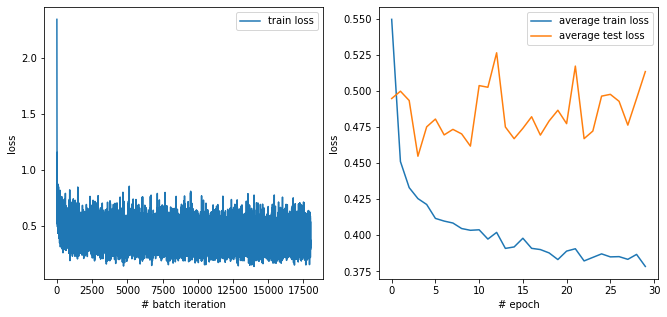

In [35]:
#### SOLUTION! ####

n_epochs = 30
batch_size=100

logger = Logger()

for i_epoch in range(n_epochs):
  for batch_X, batch_y in get_batches(X_train, y_train,
                                      batch_size=batch_size,
                                      shuffle=True):
    loss = loss_function(model(batch_X), batch_y)
    
    model.zero_grad()
    loss.backward()
    optimizer.step()
    
    logger.fill_train(loss.item())
  
  for batch_X, batch_y in get_batches(X_test, y_test,
                                      batch_size=batch_size):
    loss = loss_function(model(batch_X), batch_y)
    logger.fill_test(loss.item())
    
  logger.finish_epoch()

Now that we've trained our model, let's evaluate the accuracy of the predictions. Here's a function we can use to compute the predictions on the test set:

In [0]:
def get_test_predictions(model, batch_size=100):
  predictions_test = np.concatenate([
    model(batch_X).to('cpu').detach().numpy()
    for batch_X, batch_y in get_batches(X_test, y_test, batch_size)
  ], axis=0)
  return np.argmax(predictions_test, axis=1)

from sklearn.metrics import accuracy_score

Use it to calculate the accuracy score here. How much did you get?

In [0]:
# Compute and print out the test accuracy of your model
<YOUR CODE HERE>

In [37]:
#### SOLUTION! ####
print(accuracy_score(y_test, get_test_predictions(model)))

0.8248


Ok, so what we did so far is just a simple logistic regression model. Let's add a hidden layer to turn it into a 'real' neural net. Modify the code above.

You can stack layers by using `torch.nn.Sequential` class:

```
model = torch.nn.Sequential(
  torch.nn.Linear(...),
  torch.nn.ELU(),
  torch.nn.Linear(...),
)
```

In this example we've put an activation layer `torch.nn.ELU` between the two linear ones. What will happen if we don't do that?

If your model starts to overfit, try adding a `torch.nn.Dropout` layer after the hidden layer. Dropout layers behave differently in training and evaluating modes, so you have specify it like this:

```
model.train() # set to training mode
# ...
# (do the training)
model.eval() # set to evaluating mode
# ...
# (perform evaluation)
```

In [0]:
loss_function = torch.nn.CrossEntropyLoss()

# Defining the model
input_size = 28 * 28 # number of pixels per image
output_size = 10 # number of classes


n_hidden = <YOUR NUMBER>
model = <YOUR NET>

# Setting up the optimizer
learning_rate = <YOUR NUMBER>
optimizer = <YOUR CODE>


n_epochs = 30
batch_size=100

logger = Logger()


# This part is as above, just copy your previous solution to make it work
for i_epoch in range(n_epochs):
  for batch_X, batch_y in <YOUR CODE>:

    # Compute the loss, zero the gradients, and make an optimization step
    <YOUR CODE HERE>

    logger.fill_train(loss.item())

  for batch_X, batch_y in <YOUR CODE>:

    # Compute the loss
    <YOUR CODE>

    logger.fill_test(loss.item())

  logger.finish_epoch()

epoch #29 	 train_loss: 0.25224484 	 test_loss: 0.38233776


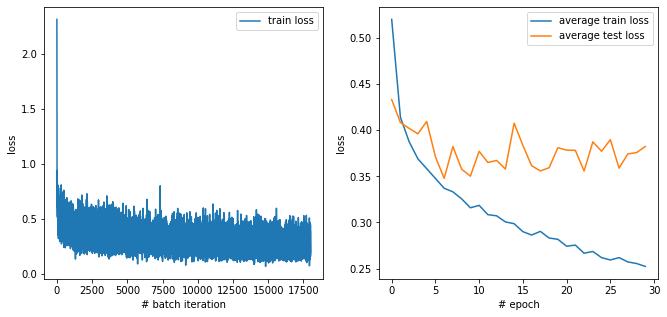

In [38]:
#### SOLUTION! ####

# Defining the loss function:
loss_function = torch.nn.CrossEntropyLoss()

# Defining the model
input_size = 28 * 28 # number of pixels per image
output_size = 10 # number of classes
n_hidden = 100
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=input_size,
                    out_features=n_hidden),
    torch.nn.ELU(),
    torch.nn.Dropout(p=0.2),
    torch.nn.Linear(in_features=n_hidden,
                    out_features=output_size),
)

# Setting up the optimizer
learning_rate = 0.005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


n_epochs = 30
batch_size=100

logger = Logger()

for i_epoch in range(n_epochs):
  model.train() # set the training mode. This is important for the Dropout
  for batch_X, batch_y in get_batches(X_train, y_train,
                                      batch_size=batch_size,
                                      shuffle=True):
    loss = loss_function(model(batch_X), batch_y)
    
    model.zero_grad()
    loss.backward()
    optimizer.step()
    
    logger.fill_train(loss.item())
  
  model.eval() # set the evaluating mode. This is important for the Dropout
  for batch_X, batch_y in get_batches(X_test, y_test,
                                      batch_size=batch_size):
    loss = loss_function(model(batch_X), batch_y)
    logger.fill_test(loss.item())
    
  logger.finish_epoch()

In [39]:
print(accuracy_score(y_test, get_test_predictions(model)))

0.8767


```
```
```
```
```
```
```
```
